In [41]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [42]:
pd.options.display.float_format = '{:.5f}'.format

In [3]:
# z-점수 정규화
def z_score_normalize(lst):
    normalized=[]
    for value in lst:
        normalized_num = (value-np.mean(lst))/np.std(lst)
        normalized.append(normalized_num)
    
    return normalized

In [4]:
# min max 정규화
def min_max_normalize(lst):
    normalized=[]
    for value in lst:
        normalized_num = (value-min(lst))/(max(lst)-min(lst))
        normalized.append(normalized_num)
    
    return normalized

In [5]:
# robustscaler
def robustscaler_normalize(lst):
    normalized=[]
    for value in lst:
        normalized_num = (value - np.median(lst))/(np.percentile(lst, 75)-np.percentile(lst, 25))
        normalized.append(normalized_num)
    
    return normalized

## 파일 불러오기

In [44]:
base_df = pd.read_csv('/Users/kwakdong-u/Library/CloudStorage/OneDrive-UOS/스타벅스 유동인구 팀플/임시데이터셋.csv',
                 encoding='euc-kr')
base_df.head()

,사업장명,인허가일자,type,주차장여부,대학거리점수,역세권여부,기존_저가카페수,저가카페_증가수,기존_중고가카페수,중고가카페_증가수,전_공시지가,후_공시지가,pop_plus,pop_minus,pop_dff,price_dff,esi_원계열,esi_순환변동치
0,경동1960,2022-12-14,일반,1,0,1,1,0,0,0,4738906.72000,4738906.72000,49581.49752,48545.32320,1036.17432,0.00000,91.50000,93.50000
1,신금호역,2022-12-08,일반,1,0,1,1,1,2,0,4282291.96625,4282291.96625,35701.65576,36400.11519,-698.45942,0.00000,91.50000,93.50000
2,이대역,2022-12-06,일반,1,3,1,3,2,4,0,7550222.36000,7550222.36000,21854.04423,21642.62423,211.42000,0.00000,91.50000,93.50000
3,언주역,2022-11-16,일반,1,0,1,2,0,3,0,12538362.46400,12538362.46400,41863.42079,41190.92861,672.49218,0.00000,91.20000,94.60000
4,왕십리역9번출구,2022-11-07,일반,1,1,1,2,0,8,0,5873566.95000,5873566.95000,99231.37200,110156.58571,-10925.21371,0.00000,91.20000,94.60000


In [45]:
base_df.describe()

,주차장여부,대학거리점수,역세권여부,기존_저가카페수,저가카페_증가수,기존_중고가카페수,중고가카페_증가수,전_공시지가,후_공시지가,pop_plus,pop_minus,pop_dff,price_dff,esi_원계열,esi_순환변동치
count,259.00000,259.00000,259.00000,259.00000,259.00000,259.00000,259.00000,259.00000,259.00000,259.00000,259.00000,259.00000,259.00000,259.00000,259.00000
mean,0.52896,0.44015,0.82625,1.00772,0.30116,4.26641,0.40541,7885594.02398,8578260.13706,110343.09453,107651.82076,2691.27377,692666.11308,96.19421,96.33050
std,0.50013,0.76711,0.37962,1.16470,0.51531,3.53094,0.74821,6707208.37157,7278234.09702,138891.24450,133853.79943,18994.44738,994876.32267,9.53227,8.06260
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,273635.36103,293137.03333,1384.27957,1305.62500,-53352.58065,-1879540.90514,61.40000,73.60000
25%,0.00000,0.00000,1.00000,0.00000,0.00000,2.00000,0.00000,3583092.33179,3903677.52213,26697.60246,25932.55612,-2795.52593,145625.05250,93.90000,94.55000
50%,1.00000,0.00000,1.00000,1.00000,0.00000,3.00000,0.00000,5743897.16667,5915617.54000,54367.38535,53446.96774,422.45437,395542.82500,98.90000,98.20000
75%,1.00000,1.00000,1.00000,2.00000,1.00000,6.00000,1.00000,9886261.31417,10777692.39417,141932.19355,132754.23321,4170.45148,900283.14687,101.80000,100.80000
max,1.00000,3.00000,1.00000,6.00000,2.00000,19.00000,4.00000,50224828.74667,50224828.74667,769845.25019,751869.50549,153886.91622,8187183.09333,109.40000,106.80000


## 공시지가 유동인구 차이값 행 생성

In [46]:
# 3개월후까지 합한값과 값과 3개월전까지 합한값의 유동인구 차이를 정규화 진행
base_df['pop_per'] = ((base_df['pop_plus'] - base_df['pop_minus']) / base_df['pop_plus']) *100

In [36]:
# 3개월후까지 합한값과 값과 3개월전까지 합한값의 유동인구 차이를 정규화 진행
base_df['price_per'] = ((base_df['후_공시지가']-base_df['전_공시지가']) / (base_df['후_공시지가'])) *100

In [37]:
base_df

,사업장명,인허가일자,주소,x,y,type,주차장여부,대학거리점수,역세권여부,기존_저가카페수,1년이내_저가카페_증가수,기존_중고가카페수,1년이내_중고가카페_증가수,전_공시지가,후_공시지가,pop_plus,pop_minus,pop_per,price_per
0,경동1960,2022-12-14,서울특별시 동대문구 고산자로36길 3 (제기동),127.038685,37.579614,일반,1,0,1,1,0,0,0,4.738907e+06,4.738907e+06,49581.497520,48545.323201,2.089841,0.000000
1,신금호역,2022-12-08,서울특별시 성동구 금호로 158-1 (금호동1가) 1~5층 전체,127.020145,37.554967,일반,1,0,1,1,1,2,0,4.282292e+06,4.282292e+06,35701.655765,36400.115189,-1.956378,0.000000
2,이대역,2022-12-06,서울특별시 서대문구 신촌로 183 (대현동),126.946280,37.557086,일반,1,3,1,3,2,4,0,7.550222e+06,7.550222e+06,21854.044227,21642.624230,0.967418,0.000000
3,언주역,2022-11-16,서울특별시 강남구 봉은사로 222 (역삼동),127.036472,37.507775,일반,1,0,1,2,0,3,0,1.253836e+07,1.253836e+07,41863.420787,41190.928611,1.606396,0.000000
4,왕십리역9번출구,2022-11-07,서울특별시 성동구 고산자로 234 (행당동),127.035267,37.560543,일반,1,1,1,2,0,8,0,5.873567e+06,5.873567e+06,99231.371997,110156.585706,-11.009838,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,상왕십리역,2017-01-11,서울특별시 성동구 왕십리로 382 (하왕십리동),127.027907,37.565169,일반,1,0,1,1,0,4,0,3.743210e+06,3.960314e+06,105943.021978,105968.727273,-0.024263,5.481996
255,명동센트럴,2018-11-19,서울특별시 중구 명동9길 16 (명동1가),126.985228,37.564643,일반,1,1,1,0,0,14,1,2.091317e+07,2.910035e+07,415573.655914,402345.258065,3.183166,28.134311
256,한강진역R,2018-02-20,서울특별시 용산구 이태원로 252 (한남동),127.000980,37.537131,R,1,1,1,0,0,2,0,6.875296e+06,8.236715e+06,14405.766667,16192.569892,-12.403389,16.528657
257,홍대입구역사거리R,2018-01-02,서울특별시 마포구 양화로 125 (서교동),126.920360,37.554636,R,1,2,1,2,1,6,1,6.664578e+06,7.693076e+06,218313.087912,221802.462366,-1.598335,13.369136


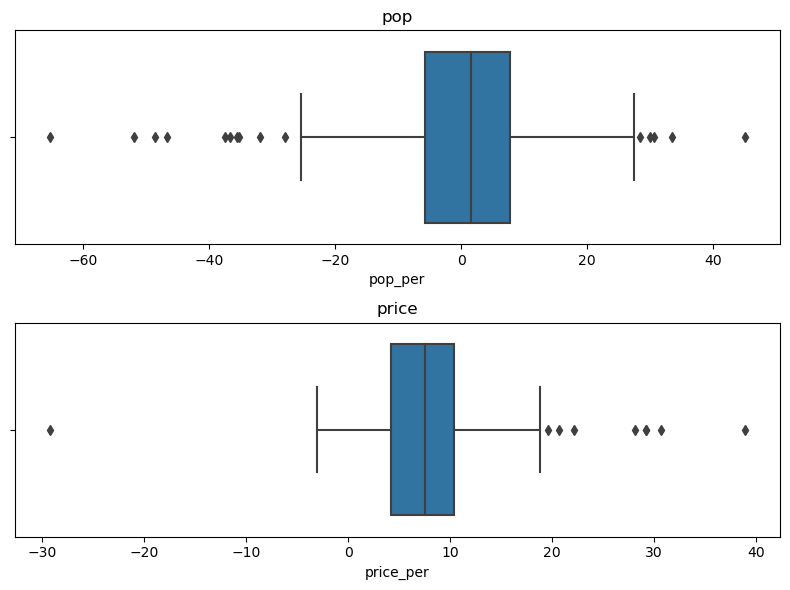

In [38]:
# 서브플롯 생성
fig, axs = plt.subplots(2, 1, figsize=(8,6))  # 2개의 그래프를 세로로 배치

# 첫 번째 그래프
sns.boxplot(x=base_df['pop_per'], ax=axs[0])
axs[0].set_title('pop')

# 두 번째 그래프
sns.boxplot(x=base_df['price_per'], ax=axs[1])
axs[1].set_title('price')

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

In [47]:
base_df.to_csv('/Users/kwakdong-u/Library/CloudStorage/OneDrive-UOS/스타벅스 유동인구 팀플/유동인구_스타벅스/전처리_데이터_peradd.csv', index=False, encoding='euc-kr')

In [40]:
base_df['type'].unique()

array(['일반', 'DT', 'R'], dtype=object)

## z_score 정규화 진행

In [25]:
# 3개월후까지 합한값과 값과 3개월전까지 합한값의 유동인구 차이를 정규화 진행
base_df['pop_normal_z'] = z_score_normalize(base_df['pop_plus'] - base_df['pop_minus'])

In [26]:
#소수점 20자리까지 보기
pd.set_option('display.precision', 20)

In [27]:
base_df.describe().style.set_precision(20)

,x,y,주차장여부,대학거리점수,역세권여부,기존_저가카페수,1년이내_저가카페_증가수,기존_중고가카페수,1년이내_중고가카페_증가수,전_공시지가,후_공시지가,pop_plus,pop_minus,pop_normal_z
count,259.00000000000000000000,259.00000000000000000000,259.00000000000000000000,259.00000000000000000000,259.00000000000000000000,259.00000000000000000000,259.00000000000000000000,259.00000000000000000000,259.00000000000000000000,259.00000000000000000000,259.00000000000000000000,259.00000000000000000000,259.00000000000000000000,259.00000000000000000000
mean,126.98680858547828620431,37.54282154038095598025,0.52895752895752901068,0.44015444015444016301,0.82625482625482626897,1.05019305019305009274,0.30115830115830116709,4.26640926640926654301,0.40540540540540542791,7885594.02398022171109914780,8578260.13706253655254840851,110343.09453252443927340209,107651.82076168675848748535,0.00000000000000002572
std,0.08244935694068368515,0.04215047337176799219,0.50012718743893092022,0.76711074219076935687,0.37962377939435826280,1.19161718390377546761,0.51530698500709593013,3.53093623562771607993,0.74820827954726099041,6707208.37157438322901725769,7278234.09702480118721723557,138891.24450083702686242759,133853.79942921677138656378,1.00193611023470330323
min,126.80607999999999435659,37.44862400000000235423,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,273635.36102564103202894330,293137.03333333332557231188,1384.27956989247309138591,1305.62500000000000000000,-2.95625139112915169548
25%,126.92415327180398776363,37.51048550000000147975,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000,0.00000000000000000000,0.00000000000000000000,2.00000000000000000000,0.00000000000000000000,3583092.33178571425378322601,3903677.52212500013411045074,26697.60246102656674338505,25932.55612047686008736491,-0.28942262125546641682
50%,126.98639699999999663760,37.54319300000000225737,1.00000000000000000000,0.00000000000000000000,1.00000000000000000000,1.00000000000000000000,0.00000000000000000000,3.00000000000000000000,0.00000000000000000000,5743897.16666666697710752487,5915617.54000000003725290298,54367.38535053762461757287,53446.96774193548480980098,-0.11967771622363278239
75%,127.04841700000000059845,37.56682700000000352247,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,2.00000000000000000000,1.00000000000000000000,6.00000000000000000000,1.00000000000000000000,9886261.31416666507720947266,10777692.39416666515171527863,141932.19354838709114119411,132754.23321187362307682633,0.07802498984611028199
max,127.17351070838724069745,37.66531249999999886313,1.00000000000000000000,3.00000000000000000000,1.00000000000000000000,6.00000000000000000000,2.00000000000000000000,19.00000000000000000000,4.00000000000000000000,50224828.74666666984558105469,50224828.74666666984558105469,769845.25018555566202849150,751869.50549450551625341177,7.97540306552795374984


In [28]:
# 3개월후까지 합한값과 값과 3개월전까지 합한값의 유동인구 차이를 정규화 진행
base_df['price_normal_z'] = z_score_normalize(base_df['후_공시지가']-base_df['전_공시지가'])

In [29]:
base_df[['pop_normal_z' ,'price_normal_z']].describe().style.set_precision(20)

,pop_normal_z,price_normal_z
count,259.00000000000000000000,259.00000000000000000000
mean,0.00000000000000002572,0.00000000000000016460
std,1.00193611023470330323,1.00193611023470352528
min,-2.95625139112915169548,-2.59045977456755949220
25%,-0.28942262125546641682,-0.55092294377342054812
50%,-0.11967771622363278239,-0.29923171829131095523
75%,0.07802498984611028199,0.20909031456032753371
max,7.97540306552795374984,7.54769916635624493750


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

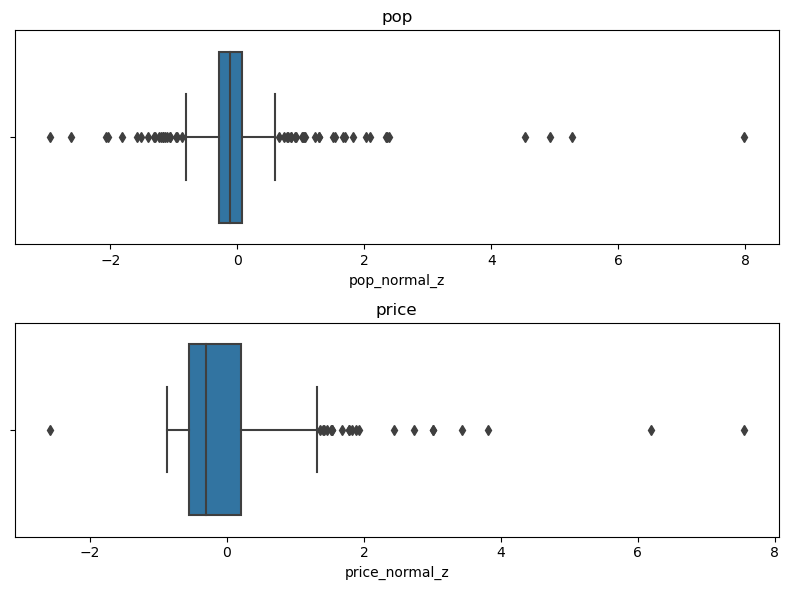

In [31]:
# 서브플롯 생성
fig, axs = plt.subplots(2, 1, figsize=(8,6))  # 2개의 그래프를 세로로 배치

# 첫 번째 그래프
sns.boxplot(x=base_df['pop_normal_z'], ax=axs[0])
axs[0].set_title('pop')

# 두 번째 그래프
sns.boxplot(x=base_df['price_normal_z'], ax=axs[1])
axs[1].set_title('price')

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

In [32]:
base_df[['사업장명', 'pop_normal_z' ,'price_normal_z']].sort_values('price_normal_z')

,사업장명,pop_normal_z,price_normal_z
98,서울웨이브아트센터,-0.08919,-2.59046
155,보라매공원R,0.38716,-0.88095
120,월계역,-0.20987,-0.71927
21,경리단길,-0.17029,-0.70484
60,포포인츠명동,-1.51001,-0.69787
...,...,...,...
117,코엑스별마당,0.78599,3.00753
181,강남교보타워R,1.50430,3.42729
161,삼성역섬유센터R,-0.55121,3.81175
166,숭례문북창,1.03092,6.18798


In [ ]:
model_df = base_df.iloc[:,[]]

In [33]:
base_df.to_csv('/Users/kwakdong-u/Library/CloudStorage/OneDrive-UOS/스타벅스 유동인구 팀플/유동인구_스타벅스/전처리_데이터.csv', index=False, encoding='euc-kr')

## min_max 정규화 진행

In [80]:
# 3개월후까지 합한값과 값과 3개월전까지 합한값의 유동인구 차이를 정규화 진행
liv['pop_normal_min_max'] = min_max_normalize(liv['pop_plus'] - liv['pop_minus'])

In [81]:
liv.describe().style.set_precision(20)

,pop_plus,pop_minus,pop_normal_z,pop_normal_min_max
count,263.00000000000000000000,263.00000000000000000000,263.00000000000000000000,263.00000000000000000000
mean,109184.30110174244327936321,106505.45717141947534400970,-0.00000000000000000169,0.27037039475550572742
std,138175.90517579577863216400,133175.43128231924492865801,1.00190657942401473157,0.09097324588493768682
min,1384.27956989247309138591,1305.62500000000000000000,-2.97764331427311956801,0.00000000000000000000
25%,26392.70463095488594262861,25498.55074413277179701254,-0.28505778260205971719,0.24448711154263302880
50%,53893.64401935483328998089,53314.40035934065963374451,-0.11990991366876085911,0.25948255921848284444
75%,139184.29517297801794484258,130034.88297809220966883004,0.07926757695086469879,0.27756790090702726514
max,769845.25018555566202849150,751869.50549450551625341177,8.03555699179509552721,1.00000000000000000000


## RobustScaler

In [96]:
# 3개월후까지 합한값과 값과 3개월전까지 합한값의 유동인구 차이를 정규화 진행
liv['pop_normal_robustscaler'] = robustscaler_normalize(liv['pop_plus'] - liv['pop_minus'])

In [97]:
liv.describe().style.set_precision(20)

,pop_plus,pop_minus,pop_normal_z,pop_normal_min_max,pop_normal_robustscaler
count,263.00000000000000000000,263.00000000000000000000,263.00000000000000000000,263.00000000000000000000,263.00000000000000000000
mean,109184.30110174244327936321,106505.45717141947534400970,-0.00000000000000000169,0.27037039475550572742,0.32912864977586581139
std,138175.90517579577863216400,133175.43128231924492865801,1.00190657942401473157,0.09097324588493768682,2.75003250021762779554
min,1384.27956989247309138591,1305.62500000000000000000,-2.97764331427311956801,0.00000000000000000000,-7.84390470131197226067
25%,26392.70463095488594262861,25498.55074413277179701254,-0.28505778260205971719,0.24448711154263302880,-0.45329775872850908147
50%,53893.64401935483328998089,53314.40035934065963374451,-0.11990991366876085911,0.25948255921848284444,0.00000000000000000000
75%,139184.29517297801794484258,130034.88297809220966883004,0.07926757695086469879,0.27756790090702726514,0.54670224127149091853
max,769845.25018555566202849150,751869.50549450551625341177,8.03555699179509552721,1.00000000000000000000,22.38512003521164217545


In [102]:
liv[liv['pop_normal_z'] == np.(liv['pop_normal_z'])]

,사업장명,pop_plus,pop_minus,pop_normal_z,pop_normal_min_max,pop_normal_robustscaler
240,미아,8116.65217,7694.19780,-0.11991,0.25948,0.00000


In [107]:
liv.sort_values('pop_normal_z').head(15)

,사업장명,pop_plus,pop_minus,pop_normal_z,pop_normal_min_max,pop_normal_robustscaler
229,국회대로,470156.44086,523509.02151,-2.97764,0.00000,-7.84390
246,서울고속터미널,303738.44086,350656.10345,-2.63568,0.03105,-6.90527
118,송파헬리오시티,677442.80135,713812.94026,-2.07516,0.08195,-5.36676
175,목동행복한,141477.68817,177437.54839,-2.05335,0.08393,-5.30691
203,공덕,61095.87912,92829.26882,-1.82875,0.10432,-4.69042
188,광화문우체국,380742.59783,408012.81319,-1.59156,0.12586,-4.03940
63,포포인츠명동,250965.45337,276900.51767,-1.52061,0.13230,-3.84464
192,선릉동신빌딩R,150086.04301,173915.14286,-1.40870,0.14246,-3.53746
228,을지로국제빌딩,361435.36559,383583.34783,-1.31936,0.15057,-3.29224
116,봉은사역,45144.53005,67101.77378,-1.30922,0.15149,-3.26442


## 시각화

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

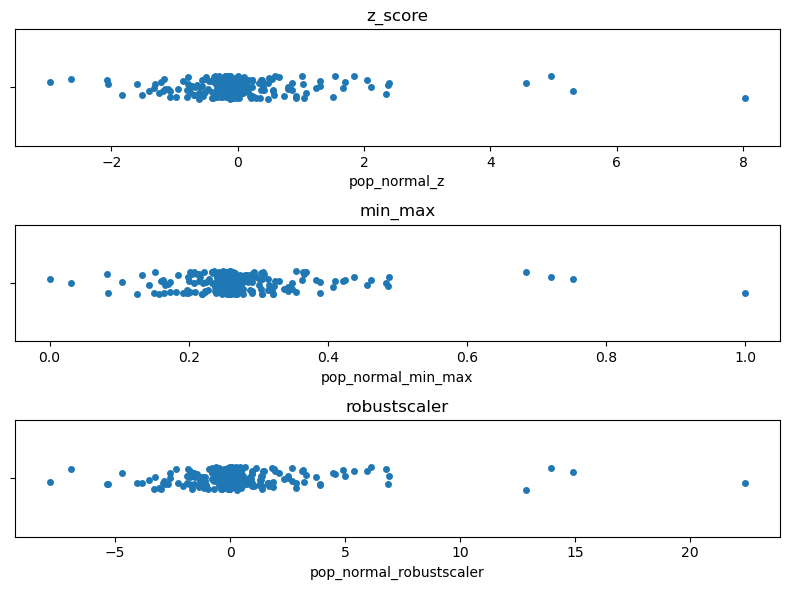

In [99]:
# 서브플롯 생성
fig, axs = plt.subplots(3, 1, figsize=(8,6))  # 2개의 그래프를 세로로 배치

# 첫 번째 그래프
sns.stripplot(x=liv['pop_normal_z'], ax=axs[0])
axs[0].set_title('z_score')

# 두 번째 그래프
sns.stripplot(x=liv['pop_normal_min_max'], ax=axs[1])
axs[1].set_title('min_max')

# 세 번째 그래프
sns.stripplot(x=liv['pop_normal_robustscaler'], ax=axs[2])
axs[2].set_title('robustscaler')

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

### 박스플롯

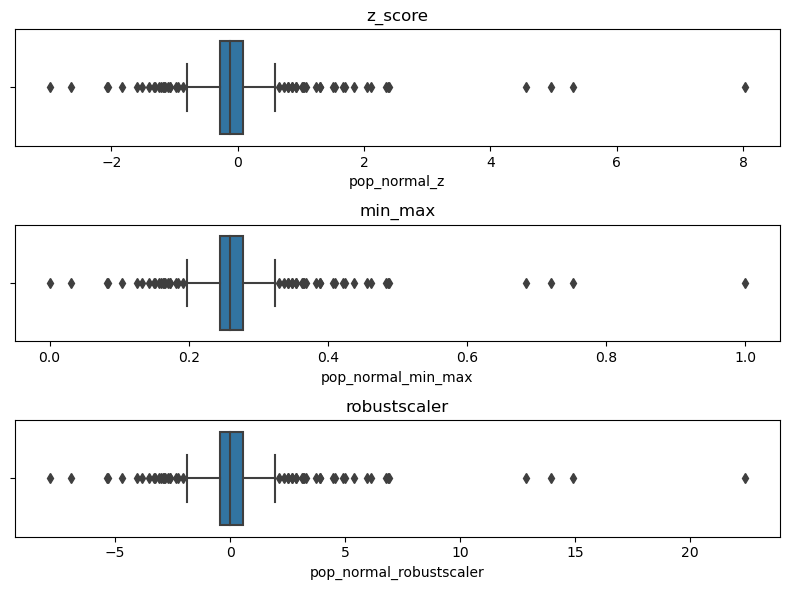

In [98]:
# 서브플롯 생성
fig, axs = plt.subplots(3, 1, figsize=(8,6))  # 2개의 그래프를 세로로 배치

# 첫 번째 그래프
sns.boxplot(x=liv['pop_normal_z'], ax=axs[0])
axs[0].set_title('z_score')

# 두 번째 그래프
sns.boxplot(x=liv['pop_normal_min_max'], ax=axs[1])
axs[1].set_title('min_max')

# 세 번째 그래프
sns.boxplot(x=liv['pop_normal_robustscaler'], ax=axs[2])
axs[2].set_title('robustscaler')

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()